<a href="https://colab.research.google.com/github/sahareV9/AI-for-Finance-Sprint/blob/main/Day4_Market_SVD_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

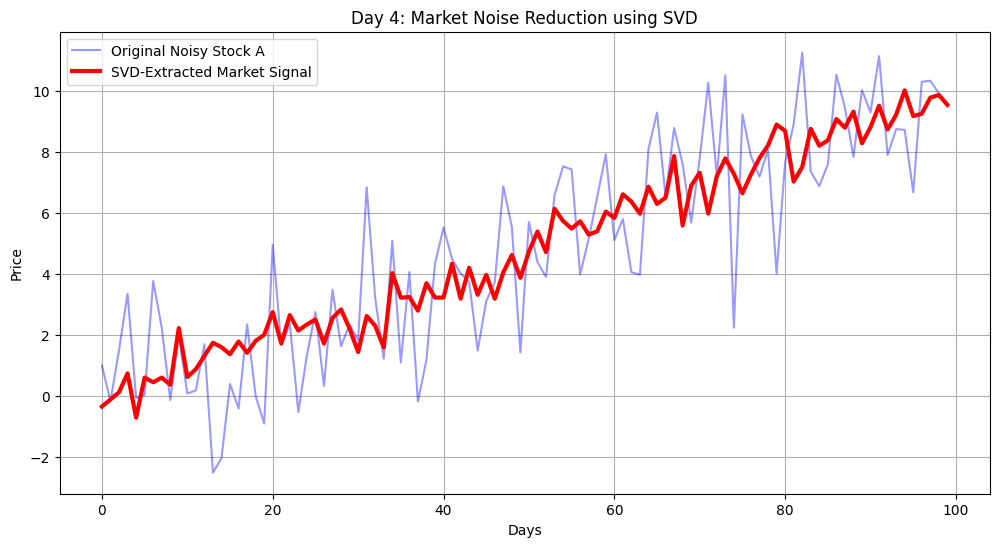

Principal Component explains 72.14% of the sector's movement.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate Synthetic 'Citi-Scale' Market Data
np.random.seed(42)
days = 100
stocks = 10

# Create a shared 'Market Signal' (the underlying trend)
market_trend = np.linspace(0, 10, days)

# Generate 10 stocks that follow the trend with added random noise
# Matrix A: (Days x Stocks)
A = np.array([market_trend + np.random.normal(0, 2, days) for _ in range(stocks)]).T

# 2. Mean-Center the data (Requirement for PCA/SVD)
A_centered = A - np.mean(A, axis=0)

# 3. Perform SVD
# S contains the 'Singular Values' (Strength of each component)
U, S, Vt = np.linalg.svd(A_centered, full_matrices=False)

# 4. Filter Noise: Keep only the Top 1 Component (The 'Market Signal')
# We zero out all other singular values
S_clean = np.zeros_like(S)
S_clean[0] = S[0] # Keep only the strongest trend

# Reconstruct the 'Clean' market data
A_clean = U @ np.diag(S_clean) @ Vt

# 5. Visualize the 'Signal vs Noise'
plt.figure(figsize=(12, 6))
plt.plot(A[:, 0], label='Original Noisy Stock A', alpha=0.4, color='blue')
plt.plot(A_clean[:, 0] + np.mean(A[:, 0]), label='SVD-Extracted Market Signal', color='red', linewidth=3)
plt.title("Day 4: Market Noise Reduction using SVD")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# 6. Metric: Variance Explained
variance_ratio = (S[0]**2 / np.sum(S**2)) * 100
print(f"Principal Component explains {variance_ratio:.2f}% of the sector's movement.")